## UPLOADING LIBRARIES AND PACKAGES

* GENERAL

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install pydotplus

  Running setup.py bdist_wheel for pydotplus: started
  Running setup.py bdist_wheel for pydotplus: finished with status 'done'
  Stored in directory: C:\Users\ADMIN\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [6]:
!pip install tabulate

  Running setup.py bdist_wheel for tabulate: started
  Running setup.py bdist_wheel for tabulate: finished with status 'done'
  Stored in directory: C:\Users\ADMIN\AppData\Local\pip\Cache\wheels\2b\67\89\414471314a2d15de625d184d8be6d38a03ae1e983dbda91e84
Successfully built tabulate


* RESAMPLING

In [7]:
import matplotlib.pyplot as plt   
from pydotplus import graph_from_dot_data
from IPython.display import Image  
import seaborn as sns
from IPython.display import HTML, display
import tabulate

* PLOTS, TABS

In [9]:
!pip install imblearn

In [10]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

* STANDARDIZATION, PCA ANALYSIS

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

* CROSS- VALIDATION

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

* DECISION TREE

In [14]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz


* KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

## DATA PREPROCESSING 

In [15]:
ls

 Volume in drive C is Windows
 Volume Serial Number is FEEE-C050

 Directory of C:\Users\ADMIN\Desktop\Implementation_3102\Implementation_3102

10/04/2019  10:31 AM    <DIR>          .
10/04/2019  10:31 AM    <DIR>          ..
02/04/2019  09:39 AM    <DIR>          .ipynb_checkpoints
15/03/2019  10:19 PM            14,164 accident.py
10/04/2019  10:31 AM         1,308,593 Accident_Analysis.ipynb
02/04/2019  09:39 AM    <DIR>          data
12/11/2018  07:38 PM             5,426 README.md
27/03/2019  08:30 AM           936,863 tree.png
               4 File(s)      2,265,046 bytes
               4 Dir(s)  71,033,806,848 bytes free


In [16]:
#reading datafiles
df1 = pd.read_csv('data/2014 excel.csv')
df2 = pd.read_csv('data/2015 excel.csv')
df3 = pd.read_csv('data/2016 excel.csv')

#merging datafiles
frames = [df1, df2, df3]
result = pd.concat(frames, axis=0)

In [17]:
#dropping unnecessary columns
result= result.drop(['Grid Ref: Northing','Grid Ref: Easting','Reference Number','Expr1','Accident Date','Lighting Conditions','1st Road Class'],axis=1)

#dropping observations with missing values
result= result.dropna(axis=0)

In [18]:
#listing objects for the further processing 
list1=['Monday','Tuesday','Wednesday','Thursday']
list2=['Friday','Saturday','Sunday']
list3=['Fine without high winds','Fine with high winds']
list4=['Snowing without high winds','Snowing with high winds']
list5=['Raining without high winds','Raining with high winds']
list6=['Fog or mist']
list7=['Minibus (8 to 16 passenger seats)','Bus or coach (17 or more passenger seats)']
list8=['Goods vehicle 3.5 tonnes mgw and under','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw','goods','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw']
list9=['Motorcycle over 50cc and up to 125cc','Motorcycle over 125cc and up to 500cc','M cycle 50cc and under','Motorcycle over 500cc','Motorcycle Unknown CC']
list10=['Car','Taxi or Private hire car']
list11=['Driver', 'Driver ']
list12=['Pedestrian']

In [19]:
#converting 'Day' feature
def b(row):
    if row['Day']in list1:
        val='weekday'
    elif row['Day']in list2:
        val='weekend'
    return val
result['Day'] = result.apply(b, axis=1)

#converting 'Weather Conditions' feature
def e(row):
    if row['Weather Conditions']in list3:
        val='fine'
    elif row['Weather Conditions']in list4:
        val='snowing'
    elif row['Weather Conditions']in list5:
        val='raining'
    elif row['Weather Conditions']in list6:
        val='fog'
    else: 
        val='other'   
    return val
result['Weather Conditions'] = result.apply(e, axis=1)

#converting 'Type of Vehicle' feature
def j(row):
    if row['Type of Vehicle']in list7:
        val='bus'
    elif row['Type of Vehicle']in list8:
        val='goods vehicle'
    elif row['Type of Vehicle']in list9:
        val='motorcycle'
    elif row['Type of Vehicle']in list10:
        val='car'
    else: 
        val='other'
    return val
result['Type of Vehicle'] = result.apply(j, axis=1)

#converting 'Time (24hr) feature
def c(row):
    if 600< row['Time (24hr)'] <= 1801:
        val='Day-time'
    else:
        val='Night-time'
    return val
result['Time (24hr)'] = result.apply(c, axis=1)

#converting 'Casualty Class' feature
def a(row):
    if row['Casualty Class']in list11:
        val='Driver'
    elif row['Casualty Class']in list12:
        val='Pedestrian'
    else: 
        val='Passenger'
    return val
result['Casualty Class'] = result.apply(a, axis=1)

#creating dummy variables for categegorical variales 
result=pd.get_dummies(result,columns=['Day','Time (24hr)','Road Surface','Weather Conditions','Casualty Class','Sex of Casualty','Type of Vehicle'])

#dealing with columns containing the same information
result = result.drop(['Day_weekday', 'Time (24hr)_Day-time', 'Sex of Casualty_Female'] , axis=1)

## RE-SAMPLING

In [20]:
result['Casualty Severity'].value_counts()

Slight     6739
Serious     957
Fatal        48
Name: Casualty Severity, dtype: int64

In [21]:
seed=12345
np.random.seed(seed)

In [22]:
#dividing dataset into two: X- independent variables and y- dependent variable  
X = result.drop('Casualty Severity', axis=1)
y = result['Casualty Severity']

In [23]:
#undersampling 'Slight' class to the 'Serious' class
array = ['Slight', 'Serious']
result_a=result.loc[result['Casualty Severity'].isin(array)]
X_a = result_a.drop('Casualty Severity', axis=1)
y_a = result_a['Casualty Severity']
sm = RandomUnderSampler()
X_a, y_a = sm.fit_sample(X_a, y_a)
label = list(X)
X_a=pd.DataFrame(data = X_a, columns = label)
y_a=pd.DataFrame(data = y_a, columns = ['Casualty Severity'])
result_b=pd.merge(y_a,X_a,right_index=True, left_index=True)
result_c=result.loc[result['Casualty Severity']=='Fatal']
cols=list(result_b)
result_c=result_c[cols]
result_d=pd.concat([result_b,result_c])
result_d['Casualty Severity'].value_counts()

Slight     957
Serious    957
Fatal       48
Name: Casualty Severity, dtype: int64

In [24]:
#oversampling 'Fatal' class to the 'Serious' class
array = ['Fatal', 'Serious']
result_e=result_d.loc[result_d['Casualty Severity'].isin(array)]
X_e = result_e.drop('Casualty Severity', axis=1)
y_e = result_e['Casualty Severity']
sm = SMOTE()
X_e, y_e = sm.fit_sample(X_e, y_e)
X_d = result_d.drop('Casualty Severity', axis=1)
label = list(X_d)
X_e=pd.DataFrame(data = X_e, columns = label)
y_e=pd.DataFrame(data = y_e, columns = ['Casualty Severity'])
result_f=pd.merge(y_e,X_e,right_index=True, left_index=True)
result_g=result_d.loc[result_d['Casualty Severity']=='Slight']
cols=list(result_f)
result_g=result_g[cols]
result_h=pd.concat([result_f,result_g])
result_h['Casualty Severity'].value_counts()

Slight     957
Fatal      957
Serious    957
Name: Casualty Severity, dtype: int64

In [25]:
#dividing dataset into two: X- independent variables and y- dependent variable  
X = result_h.drop('Casualty Severity', axis=1)
y = result_h['Casualty Severity']
result=result_h

## STANDARDIZATION AND PCA ANALYSIS

In [26]:
#standardization 
stdsc = StandardScaler()
X_1 = stdsc.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


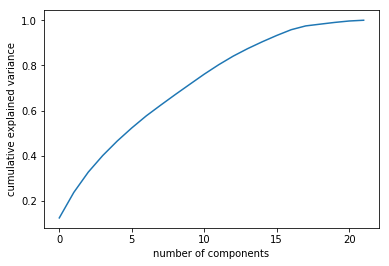

In [27]:
#choosing the number of components for PCA
pca = PCA().fit(X_1.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
#the first 12 components contain approximately 90% of the variance

In [28]:
#PCA
pca = PCA(n_components=12)
X_2 = pca.fit_transform(X_1)

## DECISION TREE

45.733280100658156
51.89907568718544
61.58318815331011
65.23978900503292
69.03600464576074
70.28951316298877
71.8569734804491
71.64767228029423
72.23976480836237
71.99610433604336
72.51899438637244
72.06627468060395
71.8569734804491
71.57871176926055
71.09090689121177
70.32447735191637
69.9066008517228
69.76759097948121
69.73226384049556
69.76698606271776
69.59289101819589
69.20949477351917
69.20937379016647
69.34874661246612
69.10508614014711
69.2789392179636
69.17440960123885
69.24421699574138
69.13968737901664
69.10484417344173
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903


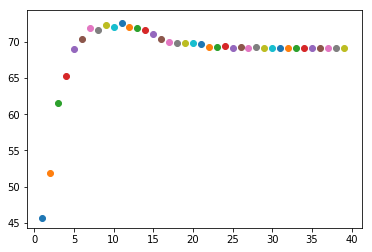

In [29]:
#searching for the depth of the tree that returns the best model accuracy
for i in range(1,40):
    tree = DecisionTreeClassifier(criterion='gini',max_depth=i ,random_state=1)  
    tree .fit(X, y) 
    y_pred =tree .predict(X)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    score = cross_val_score(tree, X, y, cv=kfold)
    mean=score.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [30]:
#defining the model with max_depth=6
tree = DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=1)  
tree.fit(X, y) 
y_pred=tree.predict(X)

#evaluation procedure
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

#cross validation
score = cross_val_score(tree, X, y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (score.mean()*100, score.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset.

mean accuracy 70.29% (standard deviation 3.41%)


In [31]:
#finding the 3 most important features
importance = tree.feature_importances_
column_names = X.columns.values.tolist()
importances = dict(zip(importance, column_names))

important_features = []

for ii in range(len(importance)):
    if ii < 3:
        important_features.append(importances[sorted(importance, reverse = True)[ii]])
        
print('The 3 most important features in decision tree model are: '+str(important_features))

The 3 most important features in decision tree model are: ['Road Surface_Wet or Damp', 'Road Surface_Dry', 'Age of Casualty']


In [ ]:
!conda install -c anaconda graphviz 

In [32]:
#plotting decision tree
dot_data = export_graphviz(tree,
                            filled=True, 
                            rounded=True,
                            out_file=None,
                            feature_names=list(X))  

graph=graph_from_dot_data(dot_data)

graph.write_png('tree.png')

from IPython.display import Image
Image('tree.png', width=1000)

InvocationException: GraphViz's executables not found

## KNN

68.65176151761518
68.82585656213706
71.26488095238096
71.99537843592722
72.7281746031746
73.25009678668216
72.30969318621759
73.00631533101044
72.58771293070072
72.93590301974447
72.7970141308556
72.7270857530004
72.93650793650792
72.97098819202478
72.83209930313589
73.11060298102981
72.34417344173441
72.41398083623693
72.03046360820751
71.78692411924119
71.43873403019745
71.40376984126985
71.26451800232287
70.95105013550136
70.98625629113434
71.36928958575301
71.12575009678669
70.98601432442895
70.98625629113432
70.84664150212929
70.60261807975223
70.74199090205188
70.67182055749129
70.56777487417733
70.28878726287263
70.2192218350755
70.46276132404181
70.32350948509485
70.18425764614788


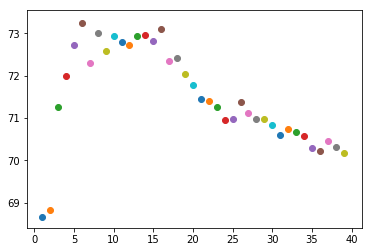

In [54]:
#searching for the number of the neighbors that returns the best model accuracy
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, p=2,
                               metric='minkowski')
    knn.fit(X_2, y)
    results3 = cross_val_score(knn, X_2, y, cv=kfold)
    mean=results3.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [55]:
#defining the model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                               metric='minkowski')
knn.fit(X_2, y)

#cross validation
results3 = cross_val_score(knn, X_2, y, cv=kfold)

print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results3.mean()*100, results3.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset. 

mean accuracy 72.73% (standard deviation 2.48%)


## SUMMARY 

In [56]:
table = [["Decision Tree",round(score.mean()*100,2),round(score.std()*100,2)],
         ["KNN",round(results3.mean()*100,2) , round(results3.std()*100,2)]]
display(HTML(tabulate.tabulate(table, headers=["Algorithm","Mean Accuracy", "Standard Deviation"], tablefmt='html')))

Algorithm,Mean Accuracy,Standard Deviation
Decision Tree,70.29,3.41
KNN,72.73,2.48
